In [2]:
# import all necesary libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import calendar
import plotly as pt
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from pylab import *
import matplotlib.patheffects as PathEffects

import descartes
# import geopandas as gpd
# from Levenshtein import distance
# from itertools import product
# from fuzzywuzzy import fuzz
# from fuzzywuzzy import process
from scipy.spatial.distance import pdist, squareform
from shapely.geometry import Point, Polygon

# import geoplot
# from geopy.geocoders import Nominatim

import warnings
warnings.filterwarnings('ignore') 

In [3]:
df = pd.read_csv("US_Accidents_Dec20_updated.csv")

In [4]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day


In [5]:
# df.columns

In [6]:
# 'Distance(mi)', 'Description','Severity', 'Start_Time', 'End_Time', 'Street',
# 'Side', 'City', 'County', 'State', 'Zipcode', 'Temperature(F)', 'Visibility(mi)', 'Weather_Condition', 'Amenity',
# 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway','Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
# 'Turning_Loop', 'Sunrise_Sunset','

In [7]:
state_df = pd.DataFrame(df['State'].value_counts()).reset_index().rename(columns={'index':'State', 'State':'Cases'})
top_ten_states_name = list(state_df['State'].head(10))
print(top_ten_states_name)

['CA', 'FL', 'OR', 'TX', 'NY', 'MN', 'VA', 'NC', 'PA', 'IL']


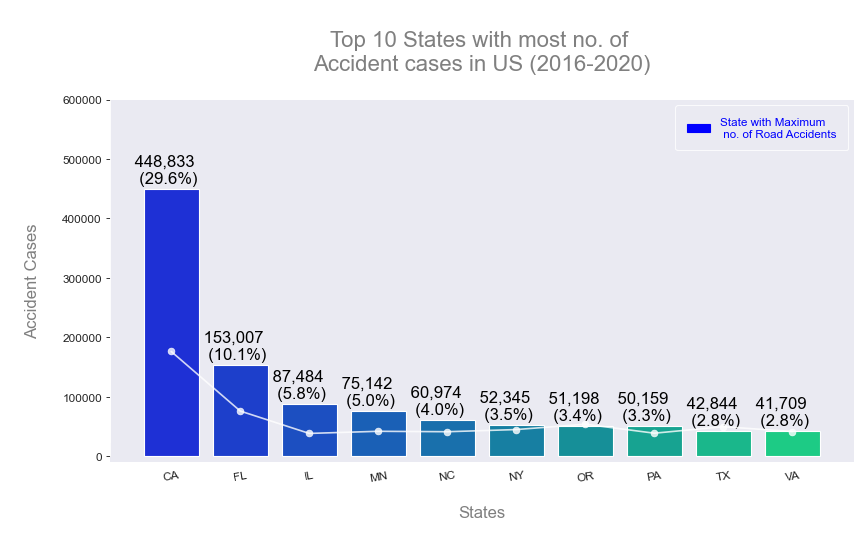

In [8]:

fig, ax = plt.subplots(figsize = (12,6), dpi = 80)

cmap = cm.get_cmap('winter', 10)   
clrs = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]

ax=sns.barplot(y=state_df['Cases'].head(10), x=state_df['State'].head(10), palette='winter')
ax1 = ax.twinx()
sns.lineplot(data = state_df[:10], marker='o', x='State', y='Cases', color = 'white', alpha = .8)
 

total = df.shape[0]
for i in ax.patches:
    ax.text(i.get_x()-0.2, i.get_height()+10000, \
            ' {:,d}\n  ({}%) '.format(int(i.get_height()), round(100*i.get_height()/total, 1)), fontsize=15,
                color='black')


ax.set(ylim =(-10000, 600000))
ax1.set(ylim =(-100000, 1700000))

plt.title('\nTop 10 States with most no. of \nAccident cases in US (2016-2020)\n', size=20, color='grey')
ax1.axes.yaxis.set_visible(False)
ax.set_xlabel('\nStates\n', fontsize=15, color='grey')
ax.set_ylabel('\nAccident Cases\n', fontsize=15, color='grey')
for i in ['top','right']:
    side1 = ax.spines[i]
    side1.set_visible(False)
    side2 = ax1.spines[i]
    side2.set_visible(False)
    
ax.set_axisbelow(True)
ax.grid(color='#b2d6c7', linewidth=1, axis='y', alpha=.3)

ax.spines['bottom'].set_bounds(0.005, 9)
ax.spines['left'].set_bounds(0, 600000)
ax1.spines['bottom'].set_bounds(0.005, 9)
ax1.spines['left'].set_bounds(0, 600000)
ax.tick_params(axis='y', which='major', labelsize=10.6)
ax.tick_params(axis='x', which='major', labelsize=10.6, rotation=10)

MA = mpatches.Patch(color=clrs[0], label='State with Maximum\n no. of Road Accidents')
ax.legend(handles=[MA], prop={'size': 10.5}, loc='best', borderpad=1, 
          labelcolor=clrs[0], edgecolor='white');

In [9]:
timezone_df = pd.DataFrame(df['Timezone'].value_counts()).reset_index().rename(columns={'index':'Timezone', 'Timezone':'Cases'})

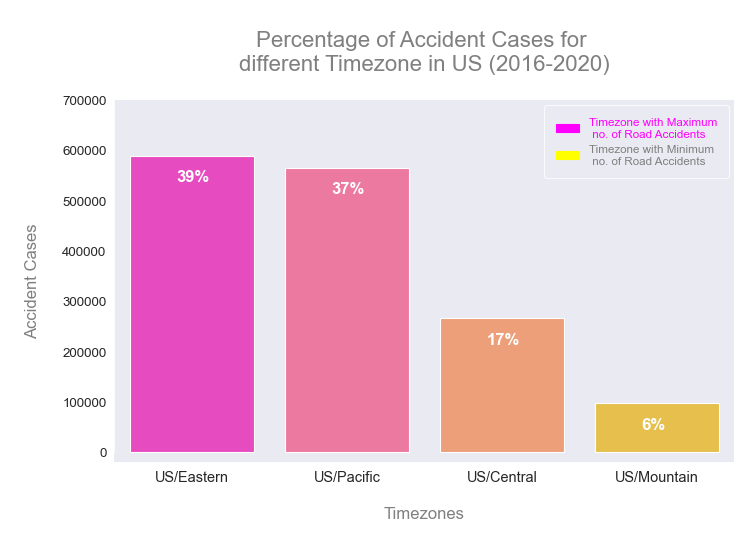

In [10]:
fig, ax = plt.subplots(figsize = (10,6), dpi = 80)

cmap = cm.get_cmap('spring', 4)   
clrs = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]

ax=sns.barplot(y=timezone_df['Cases'], x=timezone_df['Timezone'], palette='spring')

total = df.shape[0]
for i in ax.patches:
    ax.text(i.get_x()+0.3, i.get_height()-50000, \
            '{}%'.format(round(i.get_height()*100/total)), fontsize=15,weight='bold',
                color='white')
    

plt.ylim(-20000, 700000)
plt.title('\nPercentage of Accident Cases for \ndifferent Timezone in US (2016-2020)\n', size=20, color='grey')
plt.ylabel('\nAccident Cases\n', fontsize=15, color='grey')
plt.xlabel('\nTimezones\n', fontsize=15, color='grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)

for i in ['top', 'right']:
    side = ax.spines[i]
    side.set_visible(False)
    
ax.set_axisbelow(True)
ax.grid(color='#b2d6c7', linewidth=1, axis='y', alpha=.3)
ax.spines['bottom'].set_bounds(0.005, 3)
ax.spines['left'].set_bounds(0, 700000)

MA = mpatches.Patch(color=clrs[0], label='Timezone with Maximum\n no. of Road Accidents')
MI = mpatches.Patch(color=clrs[-1], label='Timezone with Minimum\n no. of Road Accidents')
ax.legend(handles=[MA, MI], prop={'size': 10.5}, loc='best', borderpad=1, 
          labelcolor=[clrs[0], 'grey'], edgecolor='white');

In [11]:
accident_duration_df = pd.DataFrame(pd.to_datetime(df['End_Time']) - pd.to_datetime(df['Start_Time'])).reset_index().rename(columns={'index':'Id', 0:'Duration'})

In [12]:
top_10_accident_duration_df = pd.DataFrame(accident_duration_df['Duration'].value_counts().head(10).sample(frac = 1)).reset_index().rename(columns={'index':'Duration', 'Duration':'Cases'})

Duration = [str(i).split('days')[-1].strip() for i in top_10_accident_duration_df.Duration]

top_10_accident_duration_df['Duration'] = Duration

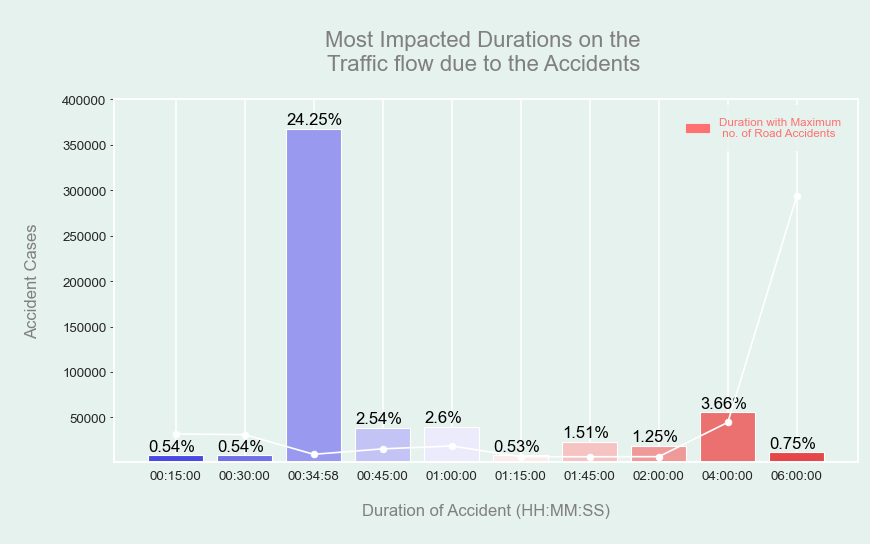

In [13]:
fig, ax = plt.subplots(figsize = (12,6), dpi = 80)
ax.set_facecolor('#e6f2ed')
fig.patch.set_facecolor('#e6f2ed')

cmap = cm.get_cmap('bwr', 10)   
clrs = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]

ax=sns.barplot(y=top_10_accident_duration_df['Cases'], x=top_10_accident_duration_df['Duration'], palette='bwr')
ax1 = ax.twinx()
sns.lineplot(data = top_10_accident_duration_df, marker='o', x='Duration', y='Cases', color = 'white', alpha = 1)

total = df.shape[0]
for i in ax.patches:
    ax.text(i.get_x(), i.get_height()+5000, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='black')

ax.set(ylim =(1000, 400000))
ax1.set(ylim =(1000, 500000))

plt.title('\nMost Impacted Durations on the \nTraffic flow due to the Accidents \n', size=20, color='grey')

ax1.axes.yaxis.set_visible(False)
ax.set_xlabel('\nDuration of Accident (HH:MM:SS)\n', fontsize=15, color='grey')
ax.set_ylabel('\nAccident Cases\n', fontsize=15, color='grey')

for i in ['bottom', 'top', 'left', 'right']:
    ax.spines[i].set_color('white')
    ax.spines[i].set_linewidth(1.5)
    ax1.spines[i].set_color('white')
    ax1.spines[i].set_linewidth(1.5)
    
ax.set_axisbelow(True)
ax.grid(color='white', linewidth=1.5)
ax.tick_params(axis='both', which='major', labelsize=12)
MA = mpatches.Patch(color=clrs[-3], label='Duration with Maximum\n no. of Road Accidents')
ax.legend(handles=[MA], prop={'size': 10.5}, loc='best', borderpad=1, 
          labelcolor=clrs[-3], facecolor='#e6f2ed', edgecolor='#e6f2ed');

In [14]:
# geo_df = gpd.GeoDataFrame(df, geometry=geometry);
# geo_df['year'] = geo_df.Start_Time.dt.year;

# accident_severity_df = geo_df.groupby(['year', 'Severity']).size().unstack()

In [15]:
year_df = pd.DataFrame(pd.to_datetime(df.Start_Time).dt.year.value_counts()).reset_index().rename(columns={'index':'Year', 'Start_Time':'Cases'}).sort_values(by='Cases', ascending=True)

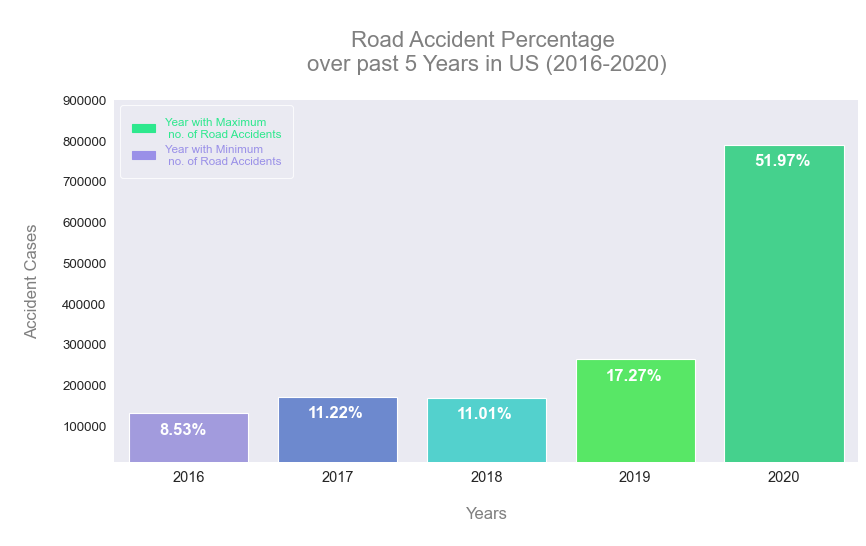

In [16]:
fig, ax = plt.subplots(figsize = (12,6), dpi = 80)

ax=sns.barplot(y=year_df['Cases'], x=year_df['Year'], palette=['#9a90e8', '#5d82de', '#3ee6e0', '#40ff53','#2ee88e'])

total = df.shape[0]
for i in ax.patches:
    ax.text(i.get_x()+0.2, i.get_height()-50000, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,weight='bold',
                color='white')

plt.ylim(10000, 900000)
plt.title('\nRoad Accident Percentage \nover past 5 Years in US (2016-2020)\n', size=20, color='grey')
plt.ylabel('\nAccident Cases\n', fontsize=15, color='grey')
plt.xlabel('\nYears\n', fontsize=15, color='grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
for i in ['bottom', 'top', 'left', 'right']:
    ax.spines[i].set_color('white')
    ax.spines[i].set_linewidth(1.5)
    

for k in ['top', 'right', "bottom", 'left']:
        side = ax.spines[k]
        side.set_visible(False)

ax.set_axisbelow(True)
ax.grid(color='#b2d6c7', linewidth=1, axis='y', alpha=0.3)
MA = mpatches.Patch(color='#2ee88e', label='Year with Maximum\n no. of Road Accidents')
MI = mpatches.Patch(color='#9a90e8', label='Year with Minimum\n no. of Road Accidents')
ax.legend(handles=[MA, MI], prop={'size': 10.5}, loc='best', borderpad=1, 
          labelcolor=['#2ee88e', '#9a90e8'], edgecolor='white');
plt.show()

<AxesSubplot:title={'center':'No. of Accidents by Weather Condition'}, xlabel='Weather_Condition', ylabel='count'>

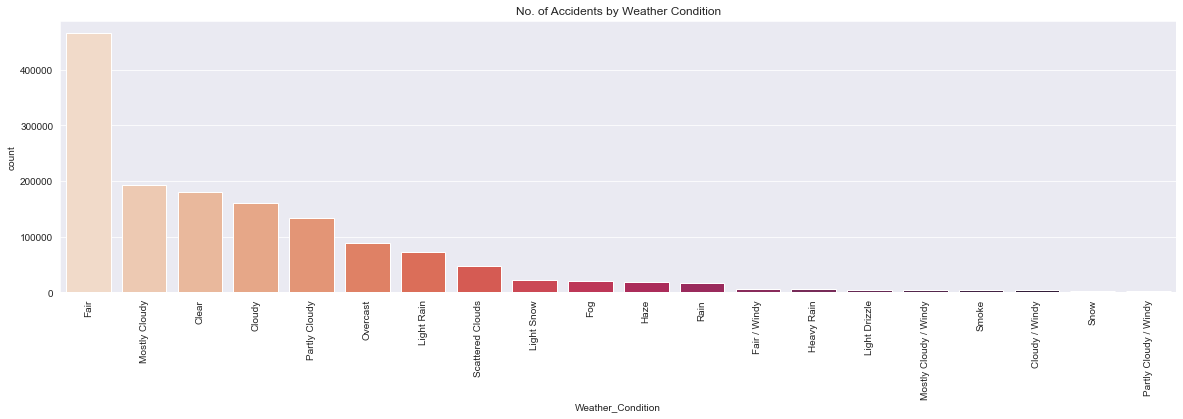

In [17]:
fig, ax = plt.subplots(figsize = (20,5))
wc_plot = sns.countplot(x=df.Weather_Condition, data=df,order=df.Weather_Condition.value_counts().iloc[:20].index, orient = 'v', palette = "rocket_r")
wc_plot.set_title("No. of Accidents by Weather Condition")
wc_plot.set_xticklabels(wc_plot.get_xticklabels(), rotation=90)
wc_plot

array([<AxesSubplot:ylabel='Severity'>], dtype=object)

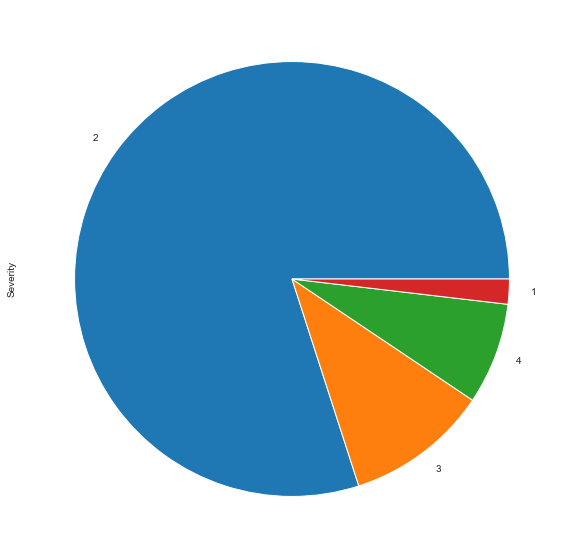

In [18]:
severity = df.Severity.value_counts()/ len(df.Severity)*100
severity.plot.pie(subplots=True,  figsize=(20, 10))

In [19]:
accidents_per_cities = df.City.value_counts()
accidents_per_cities[:10]


Los Angeles    39984
Miami          36233
Charlotte      22203
Houston        20843
Dallas         19497
Sacramento     18431
Orlando        16169
Portland       14805
San Diego      14090
Minneapolis    12653
Name: City, dtype: int64

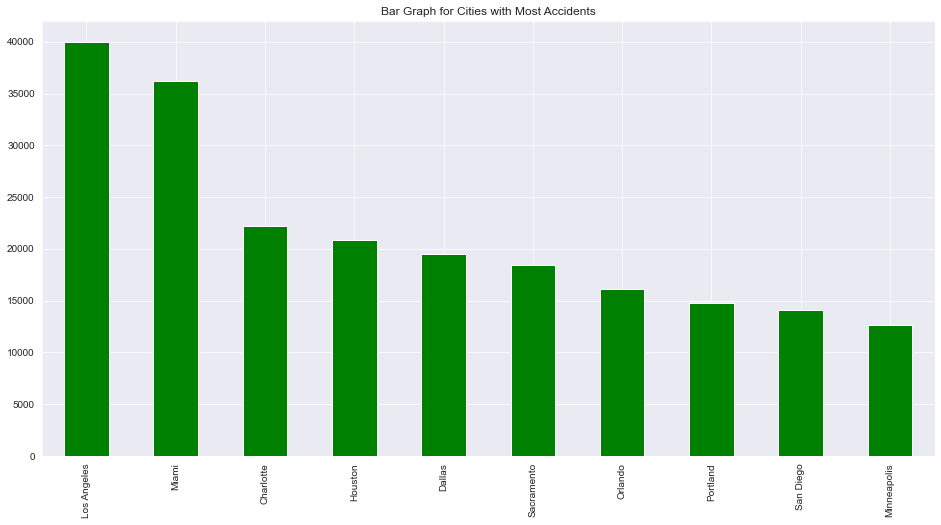

In [20]:
## Top 10 cities with most accidents
plt.figure(figsize=(16,8))
accidents_per_cities[:10].plot(kind= 'bar', color='green')
plt.title("Bar Graph for Cities with Most Accidents")
plt.show()

[]

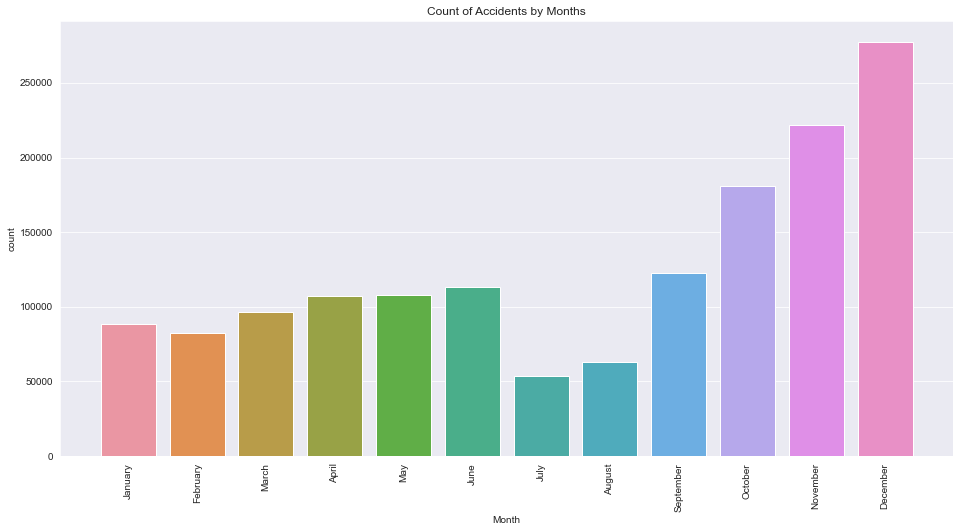

In [21]:
## Get and plot  the Month
import calendar
month_names = list(calendar.month_name)[1:]
accident_start_time = pd.to_datetime(df.Start_Time)
plt.figure(figsize=(16,8))
accident_start_time.dt.month
sns.countplot(accident_start_time.dt.month)
plt.title('Count of Accidents by Months')
# plt.xticks(np.arange(0,12),np.arange(1,13),rotation=90)
plt.xticks(np.arange(0,12),month_names,rotation=90)
plt.xlabel('Month')
plt.plot()

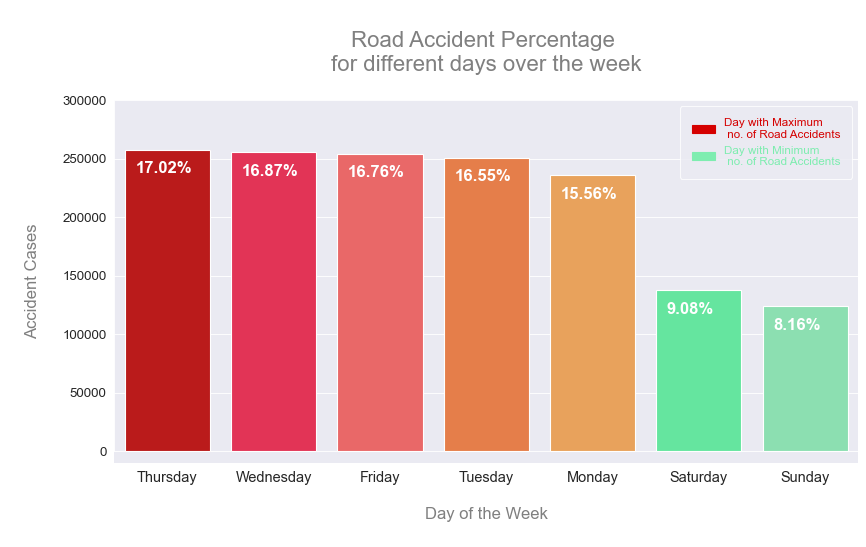

In [22]:
day_df = pd.DataFrame(pd.to_datetime(df.Start_Time).dt.day_name().value_counts()).reset_index().rename(columns={'index':'Day', 'Start_Time':'Cases'})
fig, ax = plt.subplots(figsize = (12,6), dpi = 80)

ax=sns.barplot(y=day_df['Cases'], x=day_df['Day'], palette=['#D50000', '#FF1744', '#FF5252', '#ff7530', '#ffa245', '#50fa9d', '#7eedb0'])

total = df.shape[0]
for i in ax.patches:
    ax.text(i.get_x()+0.1, i.get_height()-20000, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,weight='bold',
                color='white')

plt.ylim(-10000, 300000)
plt.title('\nRoad Accident Percentage \nfor different days over the week\n', size=20, color='grey')
plt.ylabel('\nAccident Cases\n', fontsize=15, color='grey')
plt.xlabel('\nDay of the Week\n', fontsize=15, color='grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)

for i in ['top', 'right']:
    side = ax.spines[i]
    side.set_visible(False)
    
ax.set_axisbelow(True)
ax.spines['bottom'].set_bounds(0.005, 6)
ax.spines['left'].set_bounds(0, 300000)
MA = mpatches.Patch(color='#D50000', label='Day with Maximum\n no. of Road Accidents')
MI = mpatches.Patch(color='#7eedb0', label='Day with Minimum\n no. of Road Accidents')

ax.legend(handles=[MA, MI], prop={'size': 10.5}, loc='best', borderpad=1, edgecolor='white', labelcolor=['#D50000', '#7eedb0']);


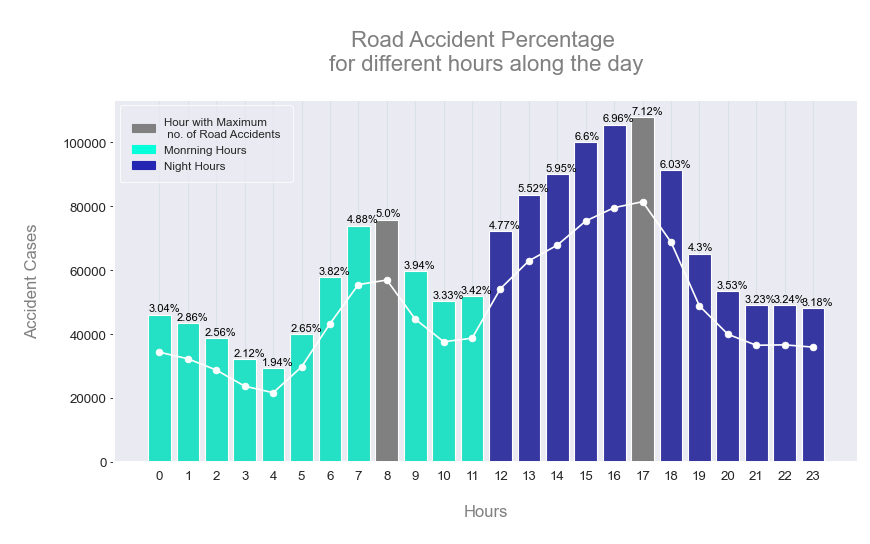

In [23]:
hour_df = pd.DataFrame(pd.to_datetime(df.Start_Time).dt.hour.value_counts()).reset_index().rename(columns={'index':'Hours', 'Start_Time':'Cases'}).sort_values('Hours')
fig, ax = plt.subplots(figsize = (12,6), dpi = 80)

clrs = []
for x in hour_df['Cases']:
    if int(hour_df[hour_df['Cases']==x]['Hours']) <= 11:
        if (x == max(list(hour_df['Cases'])[:12])):
            clrs.append('grey')
        else:
            clrs.append('#05ffda')
    else:
        if (x == max(list(hour_df['Cases'])[12:])):
            clrs.append('grey')
        else:
            clrs.append('#2426b3')
ax=sns.barplot(y=hour_df['Cases'], x=hour_df['Hours'], palette=clrs)
ax1 = ax.twinx()

sns.lineplot(data = hour_df, marker='o', x='Hours', y='Cases', color = 'white', alpha = 1)

total = df.shape[0]
for i in ax.patches:
    ax.text(i.get_x(), i.get_height()+1000, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=10,
                color='black')

plt.ylim(1000, 150000)
plt.title('\nRoad Accident Percentage \nfor different hours along the day\n', size=20, color='grey')
ax1.axes.yaxis.set_visible(False)
ax.set_xlabel('\nHours\n', fontsize=15, color='grey')
ax.set_ylabel('\nAccident Cases\n', fontsize=15, color='grey')

for i in ['bottom', 'top', 'left', 'right']:
    ax.spines[i].set_color('white')
    ax.spines[i].set_linewidth(1.5)
    ax1.spines[i].set_color('white')
    ax1.spines[i].set_linewidth(1.5)
    
ax.set_axisbelow(True)
ax.grid(color='#b2d6c7', linewidth=1, alpha=.3)
ax.tick_params(axis='both', which='major', labelsize=12)

MA = mpatches.Patch(color='grey', label='Hour with Maximum\n no. of Road Accidents')
MO = mpatches.Patch(color='#05ffda', label='Monrning Hours')
NI = mpatches.Patch(color='#2426b3', label='Night Hours')

ax.legend(handles=[MA, MO, NI], prop={'size': 10.5}, loc='upper left', borderpad=1, edgecolor='white');

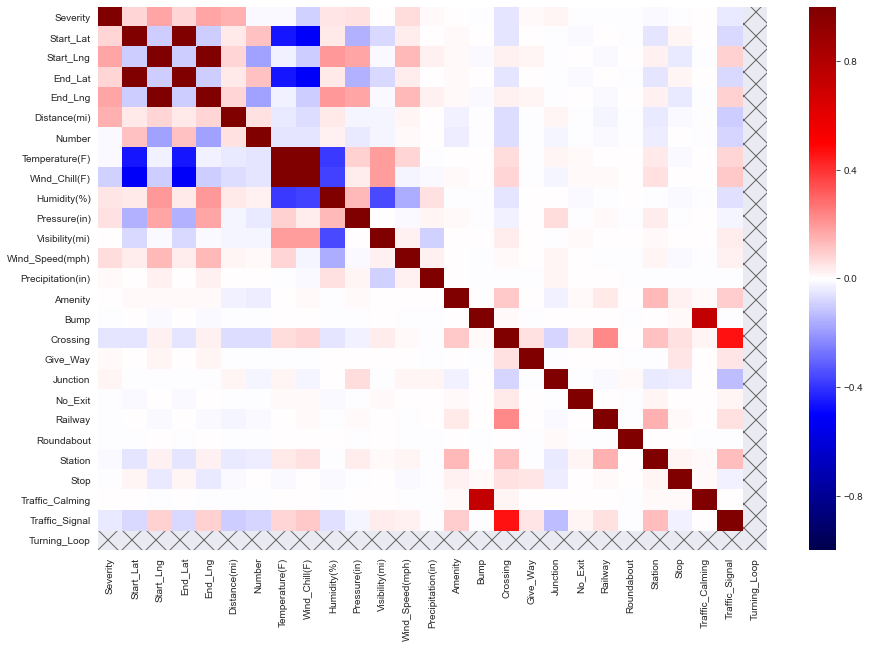

In [24]:
corr_matrix = df.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, cmap="seismic")
plt.gca().patch.set(hatch="X", edgecolor="#666")
plt.show()

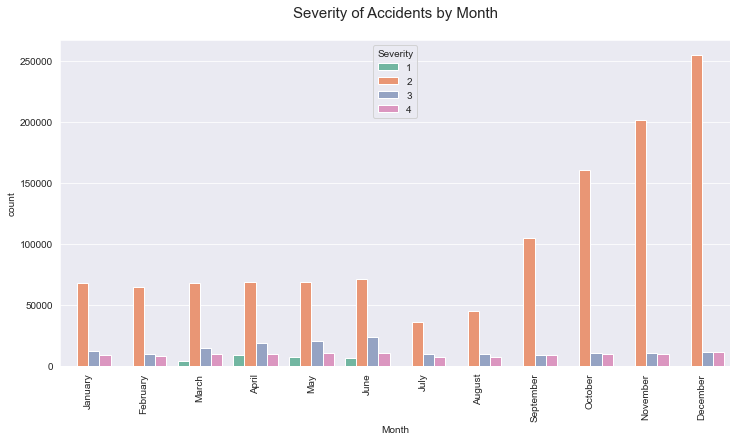

In [25]:

plt.figure(figsize=(12,6))
month_names = list(calendar.month_name)[1:]
nmonth = pd.to_datetime(df['Start_Time']).dt.month
df['Month'] = nmonth
sns.countplot(x='Month', hue='Severity', data=df ,palette="Set2")
plt.title('Severity of Accidents by Month', size=15, y=1.05)
plt.xticks(np.arange(0,12),month_names,rotation=90)
plt.show()


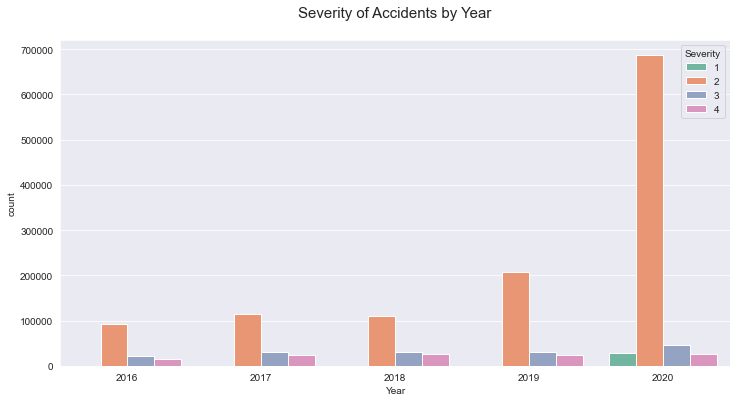

In [26]:
plt.figure(figsize=(12,6))
df['Year'] = pd.to_datetime(df['Start_Time']).dt.year
df.Year = df.Year.astype(str)
sns.countplot(x='Year', hue='Severity', data=df ,palette="Set2")
plt.title('Severity of Accidents by Year', size=15, y=1.05)
plt.show()

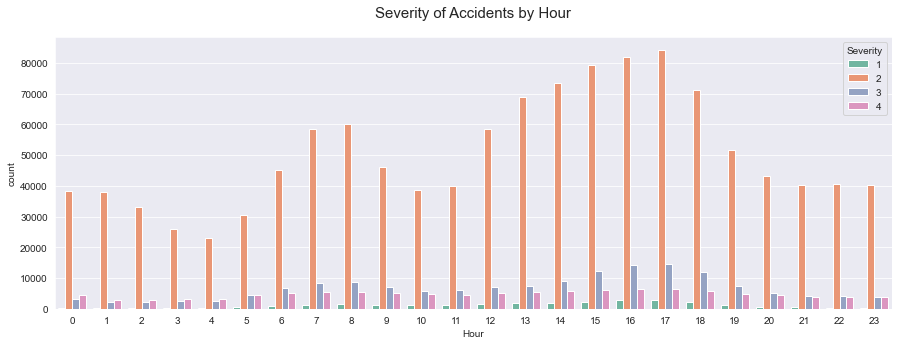

In [27]:
df['Hour'] = pd.to_datetime(df['Start_Time']).dt.hour
plt.figure(figsize=(15,5))
sns.countplot(x='Hour', hue='Severity', data=df ,palette="Set2")
plt.title('Severity of Accidents by Hour', size=15, y=1.05)
plt.show()

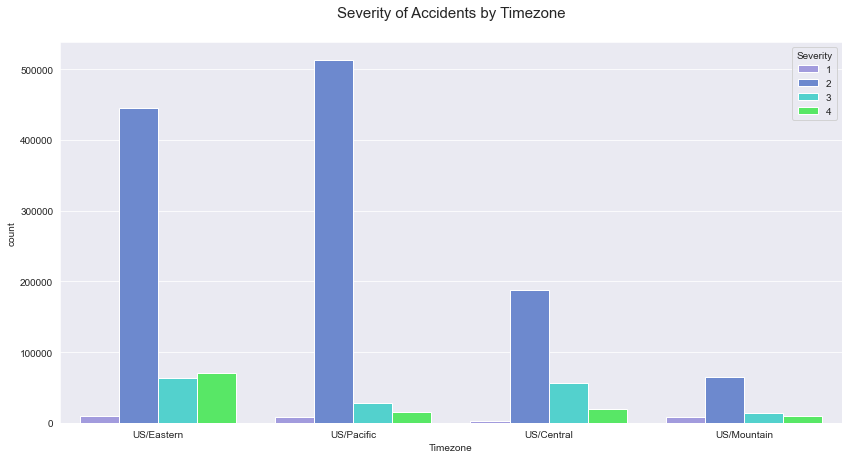

In [28]:
plt.figure(figsize=(14,7))
chart = sns.countplot(x='Timezone', hue='Severity', data=df ,palette=['#9a90e8', '#5d82de', '#3ee6e0', '#40ff53','#2ee88e'])
plt.title("Severity of Accidents by Timezone", size=15, y=1.05)
plt.show()

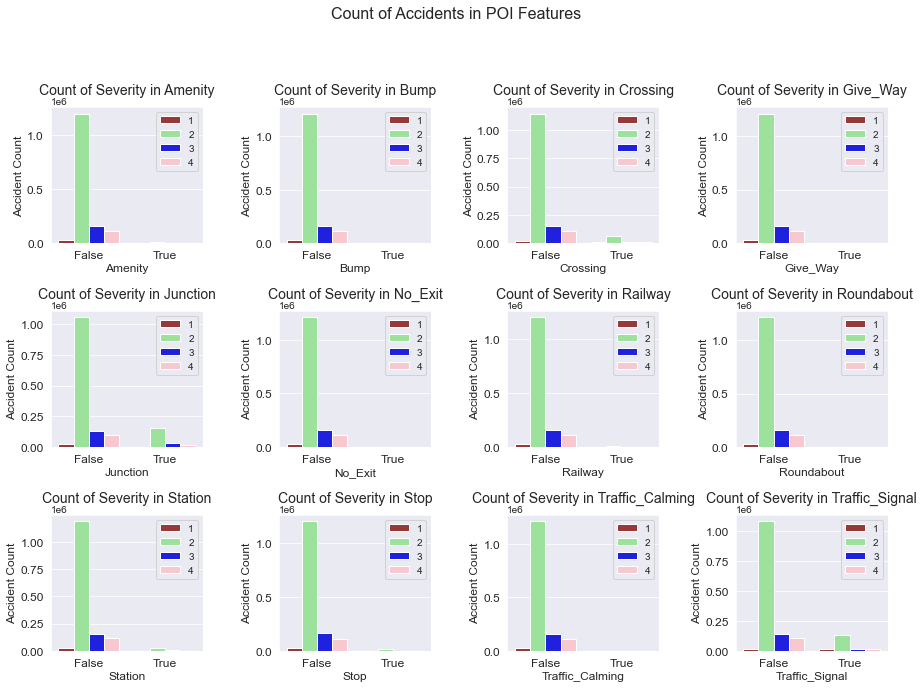

In [29]:
POI_features = ['Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal']

fig, axs = plt.subplots(ncols=3, nrows=4, figsize=(15, 10))

plt.subplots_adjust(hspace=0.5,wspace = 0.5)
for i, feature in enumerate(POI_features, 1):    
    plt.subplot(3, 4, i)
    sns.countplot(x=feature, hue='Severity', data=df, palette=['brown', 'lightgreen', 'blue', 'pink','purple'])
    
    plt.xlabel('{}'.format(feature), size=12, labelpad=3)
    plt.ylabel('Accident Count', size=12, labelpad=3)    
    plt.tick_params(axis='x', labelsize=12)
    plt.tick_params(axis='y', labelsize=12)
    
    plt.legend(['1', '2', '3', '4'], loc='upper right', prop={'size': 10})
    plt.title('Count of Severity in {}'.format(feature), size=14, y=1.05)
fig.suptitle('Count of Accidents in POI Features',y=1.02, fontsize=16)
plt.show()

In [30]:
df.Timezone

0          US/Eastern
1          US/Eastern
2          US/Eastern
3          US/Eastern
4          US/Eastern
              ...    
1516059    US/Pacific
1516060    US/Pacific
1516061    US/Pacific
1516062    US/Pacific
1516063    US/Pacific
Name: Timezone, Length: 1516064, dtype: object

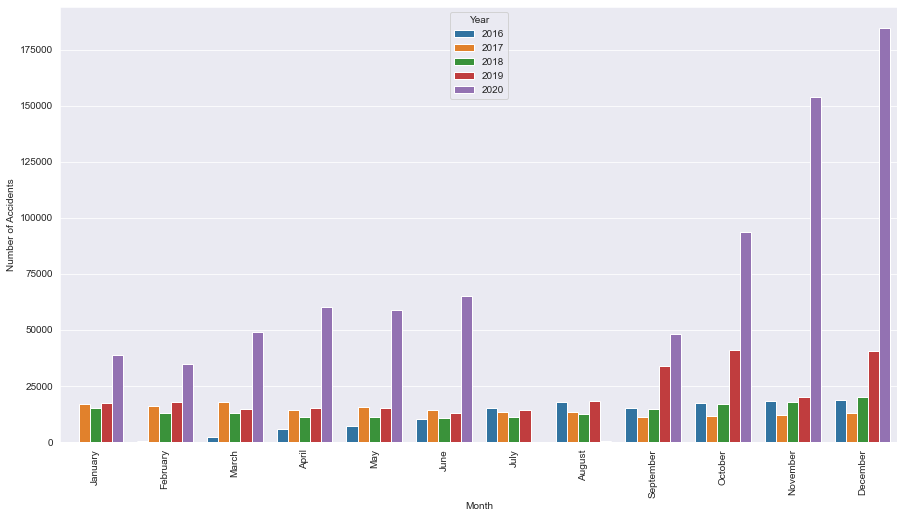

In [32]:
# monthly_accidents=df["Month"].value_counts().reset_index()
# monthly_accidents.columns=["Month","Accidents"]
monthly_accidents=df[["Month","Year"]].value_counts().reset_index()
monthly_accidents.columns=["Month","Year","number_of_accidents"]
plt.figure(figsize=(15,8))
sns.barplot(x="Month",y="number_of_accidents",hue="Year",data=monthly_accidents)
plt.xticks(np.arange(0,12),month_names,rotation=90)
plt.ylabel('Number of Accidents')
plt.show()

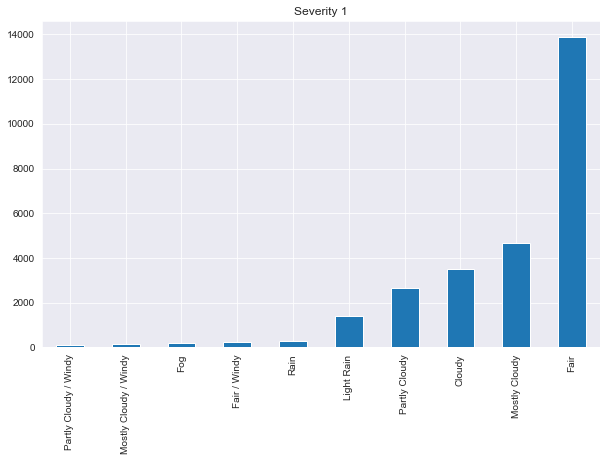

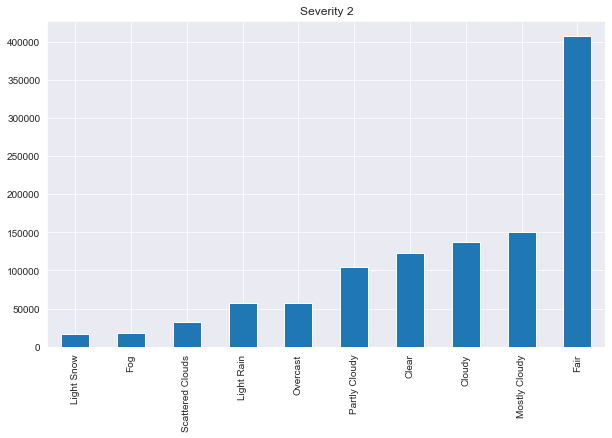

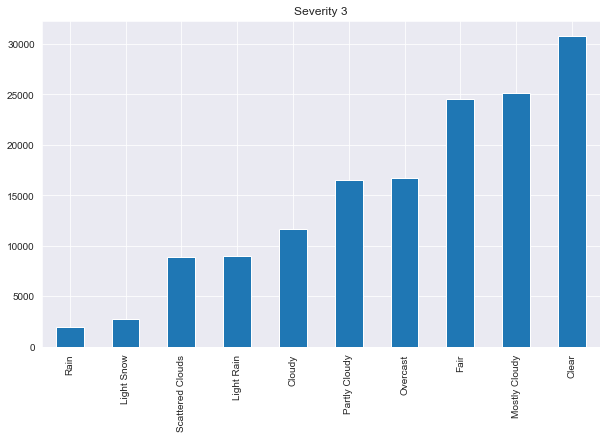

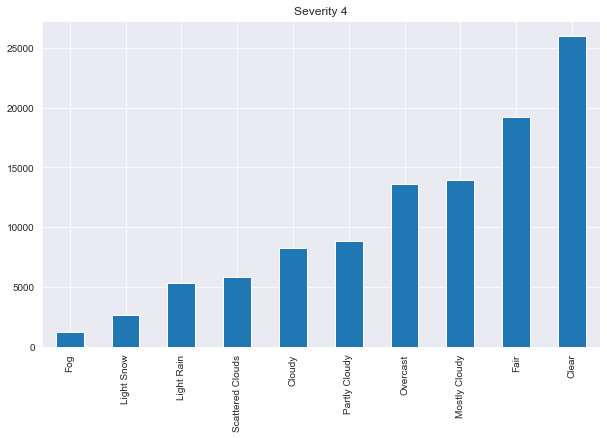

In [33]:
for x in range(1,5):
    plt.subplots(figsize=(10,6))
#     plt.title('Severity '+str(x))
    plt.title('Severity {}'.format(x))
    df.loc[df["Severity"] == x]['Weather_Condition'].value_counts().sort_values()[-10:].plot(kind="bar")
    plt.show()
    
    

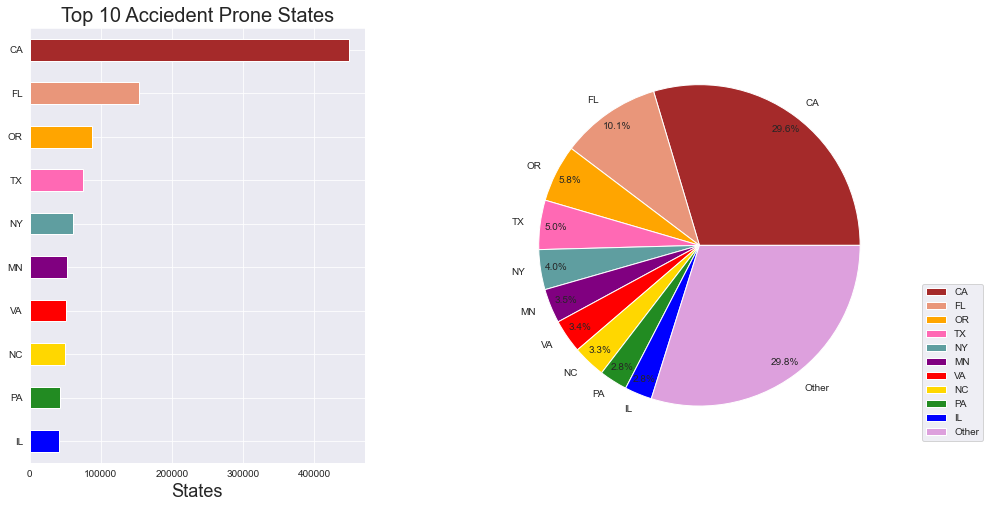

In [34]:

fig,ax=plt.subplots(1,2,figsize=(15,8))
clr = ("blue", "forestgreen", "gold", "red", "purple",'cadetblue','hotpink','orange','darksalmon','brown')
df.State.value_counts().sort_values(ascending=False)[:10].sort_values().plot(kind='barh',color=clr,ax=ax[0])
ax[0].set_title("Top 10 Acciedent Prone States",size=20)
ax[0].set_xlabel('States',size=18)


count=df['State'].value_counts()
groups=list(df['State'].value_counts().index)[:10]
counts=list(count[:10])
counts.append(count.agg(sum)-count[:10].agg('sum'))
groups.append('Other')
type_dict=pd.DataFrame({"group":groups,"counts":counts})
clr1=('brown','darksalmon','orange','hotpink','cadetblue','purple','red','gold','forestgreen','blue','plum')
qx = type_dict.plot(kind='pie', y='counts', labels=groups,colors=clr1,autopct='%1.1f%%', pctdistance=0.9, radius=1.2,ax=ax[1])
plt.legend(loc=0, bbox_to_anchor=(1.15,0.4)) 
plt.subplots_adjust(wspace =0.5, hspace =0)
plt.ioff()
plt.ylabel('')
pass

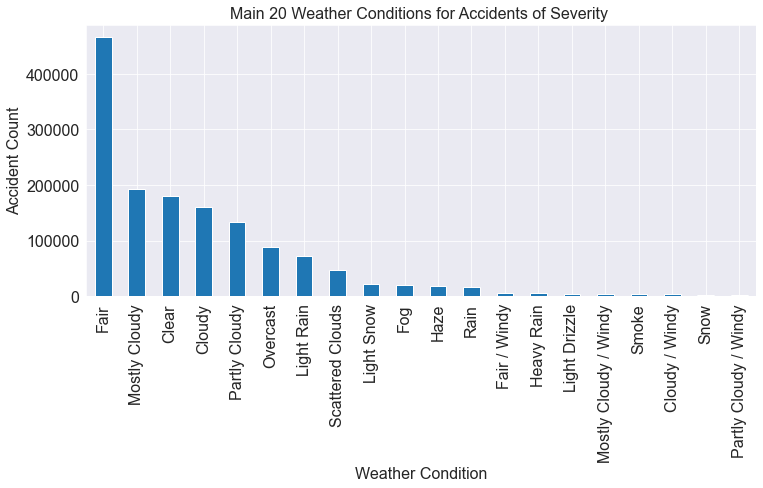

In [37]:
plt.subplots(figsize=(12,5))
df['Weather_Condition'].value_counts().head(20).plot.bar(width=0.5,align='center')
plt.xlabel('Weather Condition',fontsize=16)
plt.ylabel('Accident Count',fontsize=16)
plt.title('Main 20 Weather Conditions for Accidents of Severity ',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

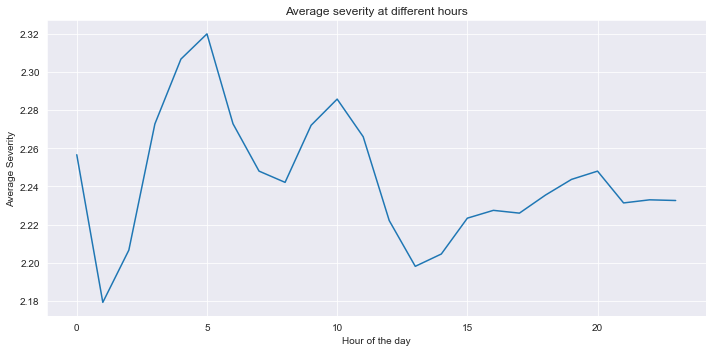

In [46]:
plt.figure(figsize=(10,5))
df.groupby('Hour')['Severity'].mean().plot(kind='line')
plt.xlabel('Hour of the day')
plt.ylabel('Average Severity')
plt.title('Average severity at different hours')
plt.tight_layout()

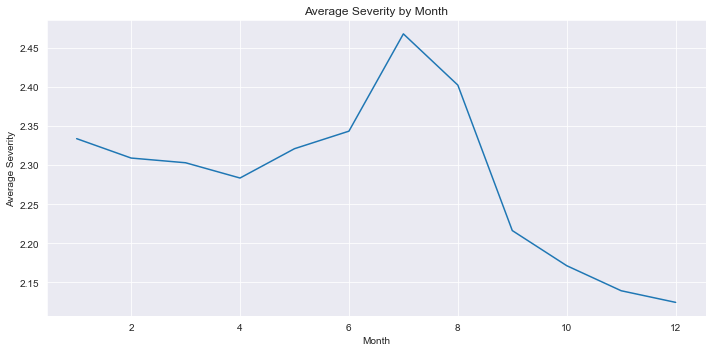

In [50]:
plt.figure(figsize=(10,5))
df.groupby('Month')['Severity'].mean().plot(kind='line')
plt.ylabel('Average Severity')
plt.title('Average Severity by Month')
plt.tight_layout()

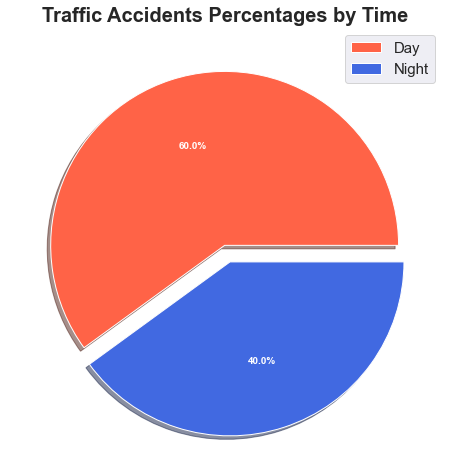

In [52]:
plt.figure(figsize = (12,8))
daynight = plt.pie(df['Sunrise_Sunset'].value_counts(),autopct='%1.1f%%',shadow = True, explode = (0,0.1), colors = ['tomato','royalblue'], textprops=dict(color="w",weight = 'bold'))
plt.legend(['Day','Night'], loc="best",prop={'size': 15})
plt.title('Traffic Accidents Percentages by Time',fontsize=20,weight='bold')
plt.show()

Top 20 accident durations correspond to 59.4% of the data


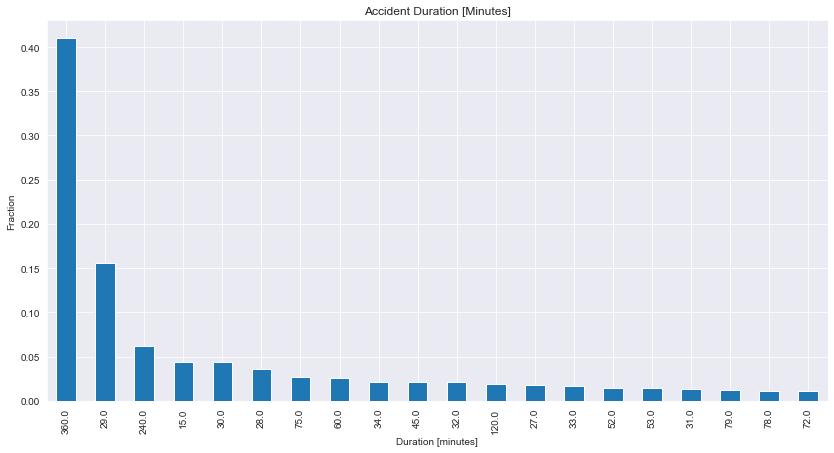

In [64]:
st = pd.to_datetime(df.Start_Time, format='%Y-%m-%d %H:%M:%S')
end = pd.to_datetime(df.End_Time, format='%Y-%m-%d %H:%M:%S')
diff = (end-st)
top20 = diff.astype('timedelta64[m]').value_counts().nlargest(20)
print('Top 20 accident durations correspond to {:.1f}% of the data'.format(top20.sum()*100/len(diff)))
(top20/top20.sum()).plot.bar(figsize=(14,7))
plt.title('Accident Duration [Minutes]')
plt.xlabel('Duration [minutes]')
plt.ylabel('Fraction');